#Práctica 3
##Pedro Otero García & Alexandre Sousa Cajide

##Q1

In this case, sensitivity is the maximum difference that can exist between the average of two neighboring databases (databases that only differ in one row). In the different row, for a maximum difference in the average, the difference between the values in both databases may be the highest possible (one may be 0, and the other 125). $\Rightarrow \Delta^{(average)} = \frac{125}{n}$

##Q2

Again we have to take into account the extreme case. Let's imagine a dataset $D$ with an odd number of rows such us the rows with $age=0$ are exactly one more than the number of rows with $age=125$ and the only ages that exist in the dataset are those ones, i.e, the median of $D$ is $0$. However if we change one of the rows that have $age=0$ for $age=125$, then the median will be $125$ $\Rightarrow \Delta^{(median)}=125.$

##Q3

The $l_1-sensitivity$, in this case, will be achived when SB1 and SB2 of $D$ are different of SB1' and SB2' of $D'$ in the row that differs. So, if $g(D)=[\sum{SB1},\sum{SB2}]$ and $g(D)=[\sum{SB1'},\sum{SB2'}] \Rightarrow \Delta^{(bitcout)}=2$.

E.g, in one database $SB1=SB2=0$ and in the other one $SB1'=SB2'=1$.

In the second part of the exercise that tell us what happend if SB1 is the complement of the bit in SB2, we will have the same answer. If $SB1=0$ & $SB2=1$ and $SB1'=1$ & $SB2'=0$, then we have the same distance as in the general case.

##Q4

If one age changes, then one bin of the histogram decreases by one and other bin increases by one. Therefore, the maximum diference between $g(D)$ and $g(D')$ is $2$, because all the values are equal except those two. $\Rightarrow \Delta^{(histogram)} = 2$.

##Q5

$$
\frac{f(R|D)}{f(R|D')}=^{(*_1)} \prod_{i=1}^{126} \frac{\frac{\epsilon}{2\Delta^{(g)}}exp\big({\frac{-\epsilon|r_i-g_i(D)|}{\Delta^{(g)}}}\big)}{\frac{\epsilon}{2\Delta^{(g)}}exp\big({\frac{-\epsilon|r_i-g_i(D')|}{\Delta^{(g)}}}\big)} = \prod_{i=1}^{126} \frac{exp\big({\frac{-\epsilon|r_i-g_i(D)|}{\Delta^{(g)}}}\big)}{exp\big({\frac{-\epsilon|r_i-g_i(D')|}{\Delta^{(g)}}}\big)}=^{(*_2)}
$$
$$
= \prod_{i=1}^{126} exp\big({\frac{\epsilon}{\Delta^{(g)}}(|r_i -g_i(D')|-|r_i -g_i(D)|)}\big) \leq^{(*_3)} \prod_{i=1}^{126} exp\big({\frac{\epsilon}{\Delta^{(g)}}(g_i(D')-g_i(D))}\big) =\\
=exp\big({\frac{\epsilon}{\Delta^{(g)}}\cdot \sum_{i=1}^{126} |g_i(D')-g_i(D)|\big)}=exp\big({\frac{\epsilon}{\Delta^{(g)}}\cdot ||g_i(D')-g_i(D)||_1}\big) \leq\\
\leq e^{\frac{\epsilon}{\Delta^{(g)}}\cdot \Delta^{(g)}} \leq e^{\epsilon}\quad\checkmark
$$

$(*_1)$ As the elements of the random vectors are independent and identically distributed, the pdf is the product of the individual pdf's.

$(*_2) \frac{x^{-i}}{x^{-j}}= x^{j-i}$

$(*_3)$ The greatest result that we can achive is with the combination $r_i<g_i(D)<g_i(D')$

## Q6

$$
\frac{f(R|D)}{f(R|D')}=^{(*_1)} \prod_{i=1}^{126} \frac{\frac{1}{\sigma\sqrt{2\pi}}exp\big({\frac{-\epsilon^2|r_i-g_i(D)|^2}{2(\Delta^{(g)})^2}}\big)}{\frac{1}{\sigma\sqrt{2\pi}}exp\big({\frac{-\epsilon^2|r_i-g_i(D')|^2}{2(\Delta^{(g)})^2}}\big)} = \prod_{i=1}^{126} \frac{exp\big({\frac{-\epsilon^2|r_i-g_i(D)|^2}{2(\Delta^{(g)})^2}}\big)}{exp\big({\frac{-\epsilon^2|r_i-g_i(D')|^2}{2(\Delta^{(g)})^2}}\big)}=^{(*_2)}
$$
$$
= \prod_{i=1}^{126} exp\big({\frac{\epsilon^2}{2(\Delta^{(g)})^2}(|r_i -g_i(D')|^2-|r_i -g_i(D)|^2)}\big) \leq^{(*_2)} \prod_{i=1}^{126} exp\big(\frac{\epsilon^2}{2(\Delta^{(g)})^2}(g_i(D')^2-g_i(D)^2)\big) =\\
= exp\big(\frac{\epsilon^2}{2(\Delta^{(g)})^2} \cdot \sum_{i=1}^{126}(g_i(D')-g_i(D))\cdot(g_i(D')+g_i(D))\big)\leq^{(*_3)}\\
\leq exp\big(\frac{\epsilon^2}{2(\Delta^{(g)})^2} \cdot \Delta^{(g)} \cdot\sum_{i=1}^{126}(g_i(D')+g_i(D))\big) = exp\big(\frac{\epsilon^2}{2\Delta^{(g)}} \ \cdot\sum_{i=1}^{126}(g_i(D')+g_i(D))\big)
$$

The value of $\epsilon$ used to be greater than $1$. Therefore, $exp\big(\frac{\epsilon^2}{2\Delta^{(g)}} \cdot\sum_{i=1}^{126}(g_i(D')+g_i(D))\big) > e^{\epsilon} \Rightarrow$ Gaussian mechanism is not secure.  

$(*_1)$ As the elements of the random vectors are independent and identically distributed, the pdf is the product of the individual pdf's.

$(*_2) \frac{x^{-i}}{x^{-j}}= x^{j-i}$

$(*_3)$ The greatest result that we can achive is with the combination $r_i<g_i(D)<g_i(D')$

##Q7

In [ ]:
!pip install faker
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from faker import Faker
import random

def createDatabase(n:int = 1000):
  data = {'Name': [], 'Age': [], 'SB1': [], 'SB2': []}
  fake = Faker()
  for _ in range(n):
    name = fake.name()
    age = random.randint(0, 125)
    sb1 = random.choice([0,1])
    sb2 = random.choice([0,1])

    data['Name'].append(name)
    data['Age'].append(age)
    data['SB1'].append(sb1)
    data['SB2'].append(sb2)

  return pd.DataFrame(data)

createDatabase(n=10)

,Name,Age,SB1,SB2
0,Chelsea Lamb PhD,120,1,0
1,Kimberly Sampson,105,0,1
2,Deborah Park,123,1,1
3,Gail Schultz,0,0,0
4,Bradley Manning,57,0,1
5,Lori Chambers,61,1,1
6,Tara Sharp,26,0,0
7,Jose Jones,23,0,0
8,Joshua Gay,89,1,1
9,Phillip Wallace,111,1,0


##Q8

In [ ]:
import numpy as np

def Q1_curated(database, epsilon):

    #Compute average
    total_sum = sum(database['Age'])
    n = len(database)
    average = total_sum / n

    #Add Laplace noise
    noise = np.random.laplace(scale=(125/n) / epsilon)

    return average, int(np.round(average + noise))

def Q2_curated(database, epsilon):

    #Compute median
    sorted_db = sorted(database['Age'])
    n = len(sorted_db)
    median = sorted_db[n // 2]

    noise = np.random.laplace(scale=(125) / epsilon)

    return median, int(np.round(median + noise))

# Function to compute the ε-Differentially Private Bitcount
def Q3_curated(database, epsilon):

    bitcount = sum(int(SB1) for SB1 in database['SB1']) #Compute bitcount

    noise = np.random.laplace(scale=2/epsilon)

    return bitcount, int(np.round(bitcount + noise))

# Function to compute the ε-Differentially Private Histogram
def Q4_curated(database, epsilon):
    age_histogram = [0] * 126
    for i in range(0, 126):
      age_histogram[i] = len(database[database['Age']==i])

    #Add Laplace noise to each factor in the histogram
    noisy_histogram = []
    for n_age in age_histogram:
        noise = np.random.laplace(scale=2/epsilon)
        noisy_histogram.append(int(np.round(n_age + noise)))

    return age_histogram, noisy_histogram

# Example usage:
database = createDatabase(n=100)
epsilon = 10

real_average, noisy_average = Q1_curated(database, epsilon)
real_median, noisy_median = Q2_curated(database, epsilon)
real_bitcount, noisy_bitcount = Q3_curated(database, epsilon)
real_histogram, noisy_histogram = Q4_curated(database, epsilon)

print('Average:', real_average)
print('Noisy Average (Q1):', noisy_average)
print()
print('Median:', real_median)
print('Noisy Median (Q2):', noisy_median)
print()
print('Bitcount:', real_bitcount)
print('Noisy Bitcount (Q3):', noisy_bitcount)
print()
print('Histogram:', real_histogram)
print('Noisy Histogram (Q4):', noisy_histogram)


Average: 59.77
Noisy Average (Q1): 60

Median: 63
Noisy Median (Q2): 64

Bitcount: 64
Noisy Bitcount (Q3): 64

Histogram: [1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 3, 1, 1, 3, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 3, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 3, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2]
Noisy Histogram (Q4): [1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 3, 1, 1, 3, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 3, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 3, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, -1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2]


##Q9

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


n = [101, 1001, 10001]
epsilon = 1

error_Q1 = []; error_Q2 = []; error_Q3 = []; error_Q4 = []
real_Q1 = []; real_Q2 = []; real_Q3 = []; real_Q4 = []
nrmsd_Q1 = []; nrmsd_Q2 = []; nrmsd_Q3 = []; nrmsd_Q4 = []

for n_i in n:
  for m in range(1,101):
    database = createDatabase(n_i)
    real_q1, curated_q1 = Q1_curated(database, epsilon)
    real_q2, curated_q2 = Q2_curated(database, epsilon)
    real_q3, curated_q3 = Q3_curated(database, epsilon)
    real_q4, curated_q4 = Q4_curated(database, epsilon)

    real_Q1.append(real_q1)
    real_Q2.append(real_q2)
    real_Q3.append(real_q3)
    real_Q4.append(real_q4)
    error_Q1.append(curated_q1 - real_q1)
    error_Q2.append(curated_q2 - real_q2)
    error_Q3.append(curated_q3 - real_q3)
    error4 = []
    for i, j in zip(curated_q4, real_q4):
      error4.append(i - j)
    error_Q4.append(error4)

  nrmsd_Q1.append(math.sqrt(sum(np.array(error_Q1)**2)/100)/(sum(np.array(real_Q1))/100))
  nrmsd_Q2.append(math.sqrt(sum(np.array(error_Q2)**2)/100)/(sum(np.array(real_Q2))/100))
  nrmsd_Q3.append(math.sqrt(sum(np.array(error_Q3)**2)/100)/(sum(np.array(real_Q3))/100))
  nrmsd_q4 = []
  for num, i in enumerate(error_Q4):
    nrmsd_q4.append(math.sqrt(sum(np.array(error_Q4[num])**2)/100)/(sum(np.array(real_Q4[num]))/100))
  nrmsd_Q4.append(nrmsd_q4)

In [40]:
print('n\t|'+'\t  101\t\t|\t  1001\t\t|\t  10001\t\t|')
print('NRMSD_Q1| '+str(nrmsd_Q1[0])+'\t| '+str(nrmsd_Q1[1])+'\t| '+str(nrmsd_Q1[2])+'\t|')
print('NRMSD_Q2| '+str(nrmsd_Q2[0])+'\t| '+str(nrmsd_Q2[1])+'\t| '+str(nrmsd_Q2[2])+'\t|')
print('NRMSD_Q3| '+str(nrmsd_Q3[0])+'\t| '+str(nrmsd_Q3[1])+'\t| '+str(nrmsd_Q3[2])+'\t|')
print()
print("NRMSD_Q4")


n	|	  101		|	  1001		|	  10001		|
NRMSD_Q1| 0.028609320085830545	| 0.014545230258120616	| 0.00982657914588157	|
NRMSD_Q2| 2.6426679362937313	| 2.3203606268568144	| 1.7291056390561192	|
NRMSD_Q3| 0.04617110383283045	| 0.006933944189355779	| 0.0008412251164748324	|

NRMSD_Q4


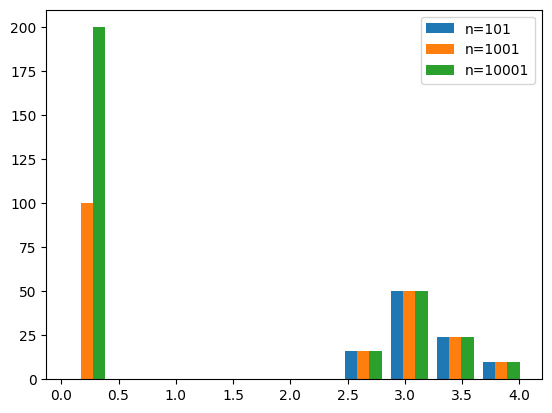

In [26]:
plt.figure()
plt.hist(np.array(nrmsd_Q4))
plt.legend(labels=['n=101', 'n=1001', 'n=10001'])
plt.show()

The lacplacian mechanism increase the variance in the result of the queries, although the mean of the result for each querie (Q1, Q2, Q3 and Q4) for a long datasets since the NRMSD also decrease.

##Q10

In [42]:
import math
import numpy as np
import matplotlib.pyplot as plt


n = [101, 1001, 10001]
epsilon = 1

original_error_Q1 = []
original_real_Q1 = []
original_nrmsd_Q1 = []
error_Q1 = []; error_Q2 = []; error_Q3 = []; error_Q4 = []
real_Q1 = []; real_Q2 = []; real_Q3 = []; real_Q4 = []
nrmsd_Q1 = []; nrmsd_Q2 = []; nrmsd_Q3 = []; nrmsd_Q4 = []

for n_i in n:
  for m in range(1,101):
    database = createDatabase(n_i)
    original_real_q1, original_curated_q1 = Q1_curated(database, epsilon)
    real_q4, curated_q4 = Q4_curated(database, epsilon)

    real_q1 = 0
    curated_q1 = 0
    count = 0
    for i, j in zip(real_q4, curated_q4):
      real_q1 += count*i
      curated_q1 += count*j
      count += 1

    real_q1 /= len(real_q4)
    curated_q1 /= len(curated_q4)

    real_Q1.append(real_q1)
    original_real_Q1.append(original_real_q1)
    error_Q1.append(curated_q1 - real_q1)
    original_error_Q1.append(original_curated_q1 - original_real_q1)

  nrmsd_Q1.append(math.sqrt(sum(np.array(error_Q1)**2)/100)/(sum(np.array(real_Q1))/100))
  original_nrmsd_Q1.append(math.sqrt(sum(np.array(original_error_Q1)**2)/100)/(sum(np.array(original_real_Q1))/100))

In [48]:
print('n\t\t |'+'\t  101\t\t|\t  1001\t\t|\t  10001\t\t|')
print('NRMSD_Q1\t | '+str(nrmsd_Q1[0])+'\t| '+str(nrmsd_Q1[1])+'\t| '+str(nrmsd_Q1[2])+'\t|')
print('ORIGINAL_NRMSD_Q1| '+str(original_nrmsd_Q1[0])+'\t| '+str(original_nrmsd_Q1[1])+'\t| '+str(original_nrmsd_Q1[2])+'\t|')

n		 |	  101		|	  1001		|	  10001		|
NRMSD_Q1	 | 0.36372706215074446	| 0.045651526881951024	| 0.00543967573176553	|
ORIGINAL_NRMSD_Q1| 0.026037853840080484	| 0.013193828511223351	| 0.008924074551896621	|


The error with the original mechanism looks to be smaller for smaller values of $n$. However, when $n$ increase the original and estimated values are more similar, indeed for $n=10001$ the error in the stimated case is lower.

For smaller values of $n$ its better to use the original mechanishm but for larger databases it can be used both because there are not significant differences.